In [1]:
import requests
from config import api_key
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
%load_ext lab_black

In [26]:
# Functions


def predict_function(i):
    return model.predict([[i]])[0]

In [3]:
# Get random latitude

lat_list = []
x = 0
while x < 501:
    lat = round(np.random.uniform(-90, 90), 5)
    lat_list.append(lat)
    x += 1

lat_list[:5]

len(lat_list)

501

In [4]:
# Get random longitudes

lon_list = []
y = 0
while y < 501:
    lon = round(np.random.uniform(-180, 180), 5)
    lon_list.append(lon)
    y += 1

lon_list[:5]

len(lon_list)

501

In [5]:
# Combine lat and long into pairs

lat_long_pairs = list(zip(lat_list, lon_list))

lat_long_pairs[:5]

[(29.11598, 138.35359),
 (79.80197, 39.56512),
 (20.48208, -31.77221),
 (75.61902, -175.01224),
 (-1.81252, 34.0227)]

In [6]:
# Pull data from API

cities_results = []

for element in lat_long_pairs:

#     data = requests.get(
#         "http://api.openweathermap.org/data/2.5/weather",
#         params={"lat": element[0], "lon": element[1], "appid": api_key,},
#     ).json()

    cities_results.append(data)

In [7]:
cities_results[:2]
# data

[{'coord': {'lon': 138.35, 'lat': 29.12},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 300.24,
   'feels_like': 302.22,
   'temp_min': 300.24,
   'temp_max': 300.24,
   'pressure': 1008,
   'humidity': 71,
   'sea_level': 1008,
   'grnd_level': 1008},
  'visibility': 10000,
  'wind': {'speed': 3.42, 'deg': 320},
  'clouds': {'all': 98},
  'dt': 1601139506,
  'sys': {'sunrise': 1601152648, 'sunset': 1601195861},
  'timezone': 32400,
  'id': 0,
  'name': '',
  'cod': 200},
 {'coord': {'lon': 39.57, 'lat': 79.8},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 272.13,
   'feels_like': 264.1,
   'temp_min': 272.13,
   'temp_max': 272.13,
   'pressure': 1007,
   'humidity': 94,
   'sea_level': 1007,
   'grnd_level': 1007},
  'visibility': 8842,
  'wind': {'speed': 8.27, 'deg': 286},
  'cloud

In [8]:
# Latitudes

lat = []
for i in range(len(cities_results)):
    lat.append(cities_results[i]["coord"]["lat"])

lat[:5]

[29.12, 79.8, 20.48, 75.62, -1.81]

In [9]:
# Temps

temp_k = []
for i in range(len(cities_results)):
    temp_k.append(cities_results[i]["main"]["temp"])

temp_k[:5]

[300.24, 272.13, 299.09, 272.27, 297.15]

In [10]:
# Convert temp_k to temp_f

# T(K) × 9/5 - 459.67

temp_f = []

for t in range(len(temp_k)):
    f = round((temp_k[t] * (9 / 5) - 459.67), 2)
    temp_f.append(f)

# Check results
print(temp_f[:2])
print(temp_k[:2])

[80.76, 30.16]
[300.24, 272.13]


In [11]:
# Cloudiness

cloud_percent = []
for i in range(len(cities_results)):
    cloud_percent.append(cities_results[i]["clouds"]["all"])

cloud_percent[:5]

[98, 100, 98, 58, 75]

In [12]:
# Humidity

humidity_percent = []
for i in range(len(cities_results)):
    humidity_percent.append(cities_results[i]["main"]["humidity"])

humidity_percent[:5]

[71, 94, 83, 97, 69]

In [13]:
# wind_speed_meters_sec

wind_speed_meters_sec = []
for i in range(len(cities_results)):
    wind_speed_meters_sec.append(cities_results[i]["wind"]["speed"])

wind_speed_meters_sec[:5]

[3.42, 8.27, 6.84, 5.82, 1.86]

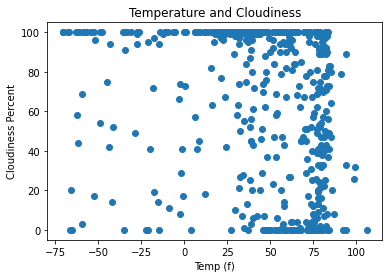

In [14]:
# Scatter plot for temp and cloudiness
fig, ax1 = plt.subplots()
ax1.set_title("Temperature and Cloudiness")
plt.xlabel("Temp (f)")
plt.ylabel("Cloudiness Percent")

plt.scatter(temp_f, cloud_percent)

plt.show()

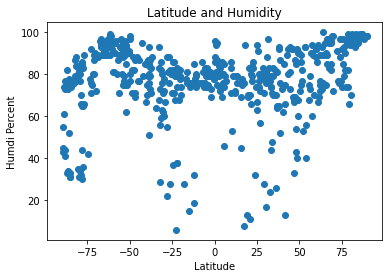

In [15]:
# Scatter plot for humidity and latitude
fig, ax2 = plt.subplots()
ax2.set_title("Latitude and Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humdi Percent")

plt.scatter(lat, humidity_percent)
plt.show()

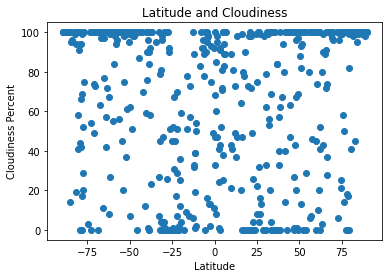

In [16]:
# Scatter plot for cloudiness and latitude
fig, ax3 = plt.subplots()
ax3.set_title("Latitude and Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness Percent")

plt.scatter(lat, cloud_percent)
plt.show()

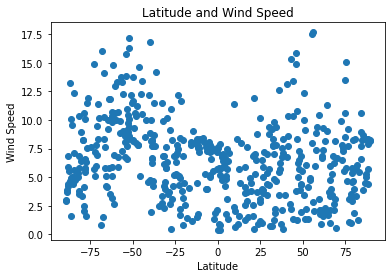

In [17]:
# Scatter plot for wind speed and latitude
fig, ax4 = plt.subplots()
ax4.set_title("Latitude and Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(lat, wind_speed_meters_sec)
plt.show()

In [18]:
# Create a DataFrame from my lists

df = pd.DataFrame(
    {
        "latitude": lat_list,
        "longitude": lon_list,
        "temp_f": temp_f,
        "wind_speed_meters_sec": wind_speed_meters_sec,
        "cloudiness": cloud_percent,
        "humidity": humidity_percent,
    }
)

df.head()

,latitude,longitude,temp_f,wind_speed_meters_sec,cloudiness,humidity
0,29.11598,138.35359,80.76,3.42,98,71
1,79.80197,39.56512,30.16,8.27,100,94
2,20.48208,-31.77221,78.69,6.84,98,83
3,75.61902,-175.01224,30.42,5.82,58,97
4,-1.81252,34.02270,75.20,1.86,75,69


In [19]:
# Add a column for northern or southern hemisphere

df["hemisphere"] = np.where(df["latitude"] >= 0, "Northern", "Southern")

df.head()

,latitude,longitude,temp_f,wind_speed_meters_sec,cloudiness,humidity,hemisphere
0,29.11598,138.35359,80.76,3.42,98,71,Northern
1,79.80197,39.56512,30.16,8.27,100,94,Northern
2,20.48208,-31.77221,78.69,6.84,98,83,Northern
3,75.61902,-175.01224,30.42,5.82,58,97,Northern
4,-1.81252,34.02270,75.20,1.86,75,69,Southern


In [31]:
# Create a df for nothern hemisphere

north = df[df["hemisphere"] == "Northern"]
north.head()
print(len(north))

246


In [30]:
# Create a df for southern hemisphere

south = df[df["hemisphere"] == "Southern"]
south.head()
print(len(south))

255


In [ ]:
# Linear Regression statements

model = LinearRegression()

The correlation coefficient is [[-0.82421211]]


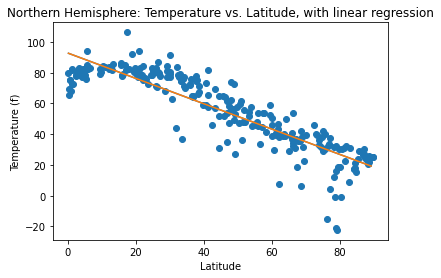

In [27]:
# Linear Regression: Northern Hemisphere - Temperature (F) vs. Latitude

X_n_temp = [[l] for l in north["latitude"]]
y_n_temp = [[t] for t in north["temp_f"]]

# print(len(X_n_temp))
# print(len(y_n_temp))

model.fit(X_n_temp, y_n_temp)

coef_n_temp = model.coef_
print(f"The correlation coefficient is {coef_n_temp}")
intercept_n_temp = model.intercept_

predict_x_n_temp = np.arange(min(north["latitude"]), max(north["latitude"]))
predict_y_n_temp = [predict_function(e) for e in predict_x_n_temp]


fig, ax5 = plt.subplots()
ax5.set_title("Northern Hemisphere: Temperature vs. Latitude, with linear regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (f)")

plt.scatter(X_n_temp, y_n_temp)

plt.plot(predict_x_n_temp, predict_y_n_temp)
plt.plot(predict_x_n_temp, predict_y_n_temp)
plt.show()

The correlation coefficient is [[1.62472448]]


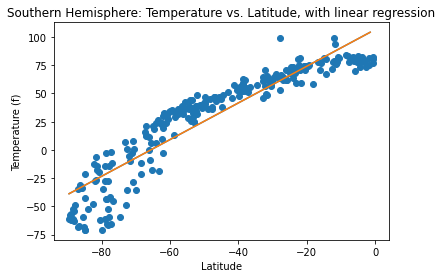

In [34]:
# Linear Regression: Southern Hemisphere - Temperature (F) vs. Latitude

X_s_temp = [[l] for l in south["latitude"]]
y_s_temp = [[t] for t in south["temp_f"]]

model.fit(X_s_temp, y_s_temp)

coef_s_temp = model.coef_
print(f"The correlation coefficient is {coef_s_temp}")
intercept_s_temp = model.intercept_

predict_x_s_temp = np.arange(min(south["latitude"]), max(south["latitude"]))
predict_y_s_temp = [predict_function(e) for e in predict_x_s_temp]


fig, ax5 = plt.subplots()
ax5.set_title("Southern Hemisphere: Temperature vs. Latitude, with linear regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (f)")

plt.scatter(X_s_temp, y_s_temp)

plt.plot(predict_x_s_temp, predict_y_s_temp)
plt.plot(predict_x_s_temp, predict_y_s_temp)
plt.show()

The correlation coefficient is [[0.24425917]]


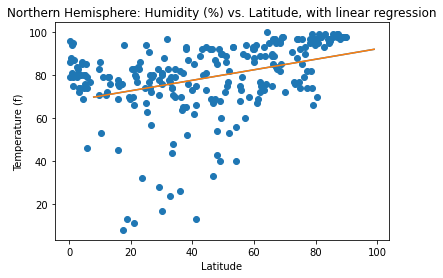

In [35]:
# Linear Regression: Northern Hemisphere - Humidity (%) vs. Latitude

X_n_humidity = [[l] for l in north["latitude"]]
y_n_humidity = [[h] for h in north["humidity"]]

model.fit(X_n_humidity, y_n_humidity)

coef_n_humidity = model.coef_
print(f"The correlation coefficient is {coef_n_humidity}")
intercept_n_humidity = model.intercept_

predict_x_n_humidity = np.arange(min(north["humidity"]), max(north["humidity"]))
predict_y_n_humidity = [predict_function(e) for e in predict_x_n_humidity]


fig, ax5 = plt.subplots()
ax5.set_title("Northern Hemisphere: Humidity (%) vs. Latitude, with linear regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

plt.scatter(X_n_humidity, y_n_humidity)

plt.plot(predict_x_n_humidity, predict_y_n_humidity)
plt.plot(predict_x_n_humidity, predict_y_n_humidity)
plt.show()

In [ ]:
# Linear Regression: Southern Hemisphere - Humidity (%) vs. Latitude

The correlation coefficient is [[0.37229531]]


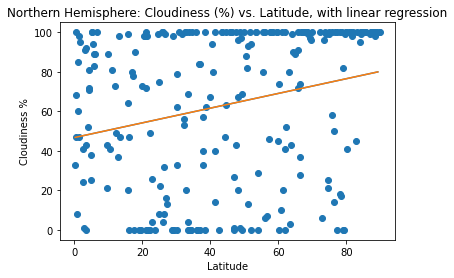

In [36]:
# Linear Regression: Northern Hemisphere - Cloudiness (%) vs. Latitude

X_n_cloudiness = [[l] for l in north["latitude"]]
y_n_cloudiness = [[c] for c in north["cloudiness"]]

model.fit(X_n_cloudiness, y_n_cloudiness)

coef_n_cloudiness = model.coef_
print(f"The correlation coefficient is {coef_n_cloudiness}")
intercept_n_cloudiness = model.intercept_

predict_x_n_cloudiness = np.arange(min(north["latitude"]), max(north["latitude"]))
predict_y_n_cloudiness = [predict_function(e) for e in predict_x_n_cloudiness]


fig, ax5 = plt.subplots()
ax5.set_title(
    "Northern Hemisphere: Cloudiness (%) vs. Latitude, with linear regression"
)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

plt.scatter(X_n_cloudiness, y_n_cloudiness)

plt.plot(predict_x_n_cloudiness, predict_y_n_cloudiness)
plt.plot(predict_x_n_cloudiness, predict_y_n_cloudiness)
plt.show()

In [ ]:
# Linear Regression: Southern Hemisphere - Cloudiness (%) vs. Latitude

The correlation coefficient is [[0.01679243]]


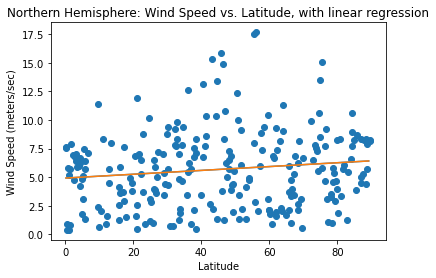

In [37]:
# Linear Regression: Northern Hemisphere - Wind Speed vs. Latitude

X_n_wind_speed_meters_sec = [[l] for l in north["latitude"]]
y_n_wind_speed_meters_sec = [[c] for c in north["wind_speed_meters_sec"]]

model.fit(X_n_wind_speed_meters_sec, y_n_wind_speed_meters_sec)

coef_n_wind_speed_meters_sec = model.coef_
print(f"The correlation coefficient is {coef_n_wind_speed_meters_sec}")
intercept_n_wind_speed_meters_sec = model.intercept_

predict_x_n_wind_speed_meters_sec = np.arange(
    min(north["latitude"]), max(north["latitude"])
)
predict_y_n_wind_speed_meters_sec = [
    predict_function(e) for e in predict_x_n_wind_speed_meters_sec
]


fig, ax5 = plt.subplots()
ax5.set_title("Northern Hemisphere: Wind Speed vs. Latitude, with linear regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meters/sec)")

plt.scatter(X_n_wind_speed_meters_sec, y_n_wind_speed_meters_sec)

plt.plot(predict_x_n_wind_speed_meters_sec, predict_y_n_wind_speed_meters_sec)
plt.plot(predict_x_n_wind_speed_meters_sec, predict_y_n_wind_speed_meters_sec)
plt.show()

In [ ]:
# Linear Regression: Southern Hemisphere - Wind Speed (mph) vs. Latitude